<a href="https://colab.research.google.com/github/HootlingGondlier/NumericalMethods-Practice/blob/main/Numerical_relativity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

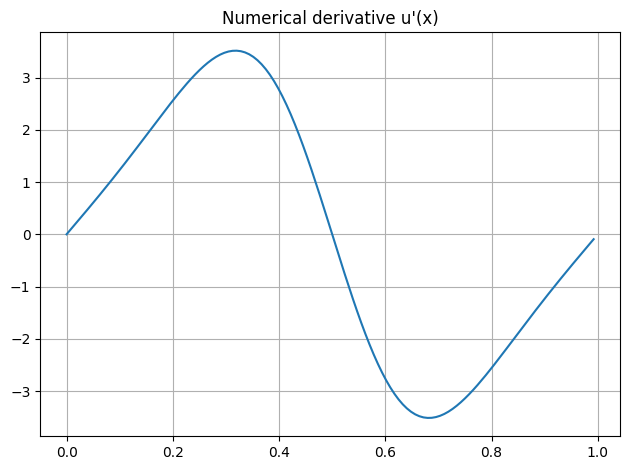

In [ ]:
#1.2.1 centred difference for u'(x)

import numpy as np
import matplotlib.pyplot as plt

N = 128
x = np.linspace(0,1,N, endpoint=False)
dx = 1/N
u = np.exp(-0.5 * np.cos(2 * np.pi * x))
u1 = u * np.pi * np.sin(2 * np.pi * x) #first derivative in analytical
u1_num = (np.roll(u, -1) - np.roll(u, 1)) / (2 * dx)#first derivative numerical


plt.plot(x, u1_num)
plt.title("Numerical derivative u'(x)")
plt.grid(True)
plt.tight_layout()
plt.show()

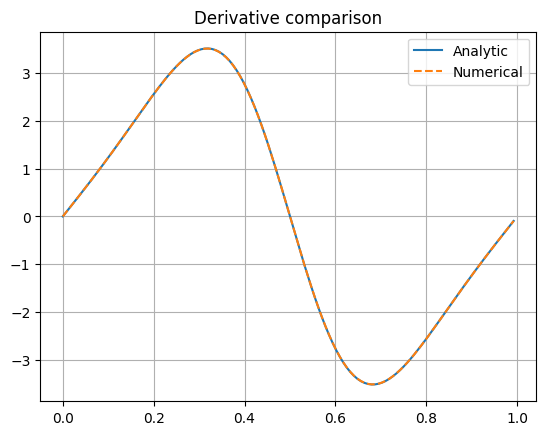

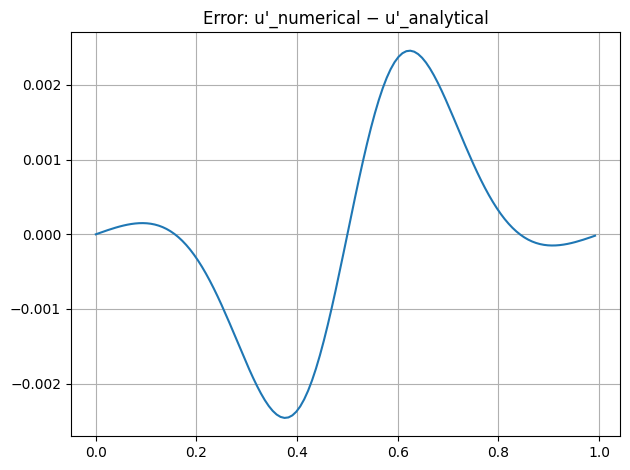

In [ ]:
#1.2.2 RMSE error and numerical vs analytical plot
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,1,N, endpoint=False)
dx = 1/N
u = np.exp(-0.5 * np.cos(2 * np.pi * x))
u1 = u * np.pi * np.sin(2 * np.pi * x) #first derivative in analytical
u1_num = (np.roll(u, -1) - np.roll(u, 1)) / (2 * dx)#first derivative numerical
err = u1_num-u1

#plot1

plt.plot(x, u1, label="Analytic")
plt.plot(x, u1_num, "--", label="Numerical")
plt.title("Derivative comparison")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(x, err)
plt.title("Error: u'_numerical − u'_analytical")
plt.grid(True)
plt.tight_layout()
plt.show()


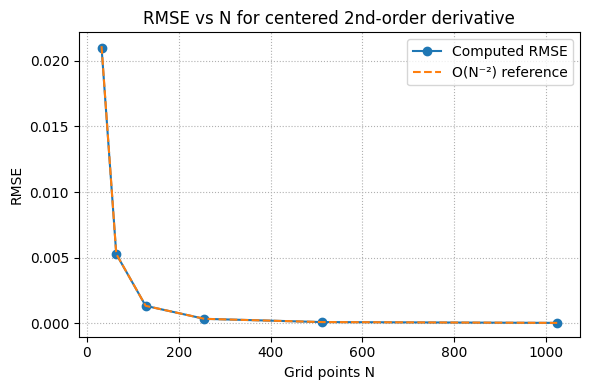

Measured slope: -1.9987450727246894
RMSEs: ['2.101e-02', '5.274e-03', '1.320e-03', '3.300e-04', '8.251e-05', '2.063e-05']


In [ ]:
#1.2.2 RMSE
#plot2

def u(x):
    return np.exp(-0.5 * np.cos(2 * np.pi * x))


def u1(x):
    return u(x) * np.pi * np.sin(2 * np.pi * x)


def centered_difference(u_num, dx):
    return (np.roll(u_num, -1) - np.roll(u_num, 1)) / (2 * dx)

# Compute RMSE for given N
def compute_rmse(N):
    x = np.linspace(0, 1, N, endpoint=False)
    dx = 1.0 / N
    du_num = centered_difference(u(x), dx)
    du_exact = u1(x)
    return np.sqrt(np.mean((du_num - du_exact)**2))

# RMSE study and plot
N_values = [2**l for l in range(5, 11)]   # N = 32 … 1024
rmses = [compute_rmse(N) for N in N_values]

plt.figure(figsize=(6,4))
plt.plot(N_values, rmses, "o-", label="Computed RMSE")
ref = rmses[-1] * (np.array(N_values[-1]) / np.array(N_values))**2
plt.plot(N_values, ref, "--", label="O(N⁻²) reference")
plt.xlabel("Grid points N")
plt.ylabel("RMSE")
plt.title("RMSE vs N for centered 2nd-order derivative")
plt.legend()
plt.grid(True, which="both", ls=":")
plt.tight_layout()
plt.show()

# Optional: print slope (order)
slope, _ = np.polyfit(np.log(N_values), np.log(rmses), 1)
print("Measured slope:", slope)
print("RMSEs:", [f"{r:.3e}" for r in rmses])

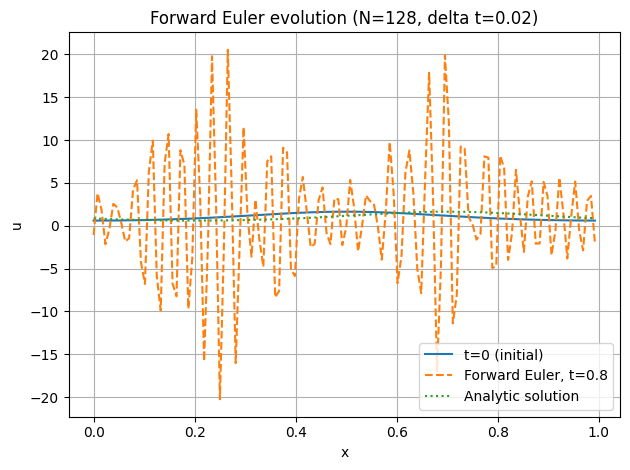

In [ ]:
#2.2.1 explicit euler method evolution

import numpy as np
import matplotlib.pyplot as plt


c = 1.0          # advection speed
t_final = 0.8    # evolve to t=1
N = 128
dt = 0.02       # time step


x = np.linspace(0, 1, N, endpoint=False)
dx = 1.0 / N
u = np.exp(-0.5 * np.cos(2 * np.pi * x))   # initial condition f(x)


def centered_difference(u_num, dx): #second order centred difference

    return (np.roll(u_num, -1) - np.roll(u_num, 1)) / (2 * dx)


def forward_euler(u0, dx, dt, t_final, c=1.0):
    u = u0.copy()
    nsteps = int(np.ceil(t_final / dt))
    for _ in range(nsteps):
        du_dx = centered_difference(u, dx)
        u = u + dt * c * du_dx

        if not np.isfinite(u).all() or np.max(np.abs(u)) > 1e6:
            print("Undefined")
            break
    return u

u_final = forward_euler(u, dx, dt, t_final, c) #euler plot
u_analytical = np.exp(-0.5 * np.cos(2 * np.pi * ((x + c*t_final) % 1.0)))


plt.plot(x, u, label='t=0 (initial)')
plt.plot(x, u_final, '--', label=f'Forward Euler, t={t_final}')
plt.plot(x, u_analytical, ':', label='Analytic solution')
plt.xlabel('x'); plt.ylabel('u')
plt.title(f'Forward Euler evolution (N={N}, delta t={dt:g})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

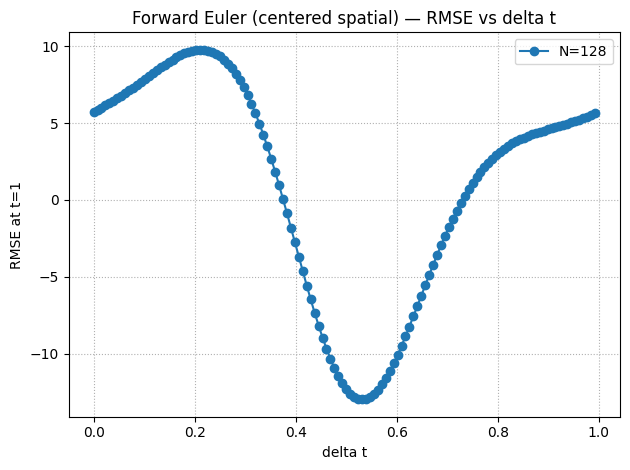


N = 128
 dt		RMSE
 1.000e-05	1.323e-03
 2.000e-05	1.330e-03
 4.000e-05	1.360e-03
 8.000e-05	1.472e-03
 1.600e-04	1.851e-03
 3.200e-04	2.914e-03
 6.400e-04	5.273e-03
 1.280e-03	1.062e-02
 2.560e-03	2.157e-02
 5.120e-03	5.725e-02
 1.024e-02	3.457e+04
 2.048e-02	1.729e+05


In [ ]:
#2.2.2 accuracy and stability analysis

import numpy as np
import matplotlib.pyplot as plt
from math import ceil

c = 1.0
t_final = 1.0

def u_initial(x):

    return np.exp(-0.5 * np.cos(2.0 * np.pi * x))

def analytic_solution(x, t, c=1.0):

    return u_initial((x + c*t) % 1.0)

def centered_difference(u1_num, dx):

    return (np.roll(u1_num, -1) - np.roll(u1_num, 1)) / (2.0 * dx)

def forward_euler_centered(u0, dx, dt, t_final, c=1.0):

    u = u0.copy()
    nsteps = int(ceil(t_final / dt))

    for n in range(nsteps):
        dudx = centered_difference(u, dx)
        u = u + dt * c * dudx

        if not np.isfinite(u).all() or np.max(np.abs(u)) > 1e12:

            return np.full_like(u, np.nan)
    return u

N_values = [128]
dt_values = [1e-5 * 2**m for m in range(0, 17)]

results = {}  # store RMSE arrays per N

for N in N_values:
    dx = 1.0 / N
    x = np.linspace(0.0, 1.0, N, endpoint=False)
    u0 = u_initial(x)
    rmses = []
    for dt in dt_values:
        u_num = forward_euler_centered(u0, dx, dt, t_final, c=c)
        u_analytical = analytic_solution(x, t_final, c=c)
        if not np.isfinite(u_num).all():
            rmse = np.nan
        else:
            rmse = np.sqrt(np.mean((u_num - u_analytical)**2))
        rmses.append(rmse)
    results[N] = np.array(rmses)

#plot for checking taking log-log as high data
for N in N_values:
    rmses = results[N]
    mask = np.isfinite(rmses)
    if np.any(mask):
        plt.plot(x, u_num, marker='o', label=f'N={N}')
    else:

        plt.plot([], [], label=f'N={N} (all unstable)')
plt.xlabel('delta t')
plt.ylabel('RMSE at t=1')
plt.title('Forward Euler (centered spatial) — RMSE vs delta t')
plt.grid(True, which='both', ls=':')
plt.legend()
plt.tight_layout()
plt.show()

for N in N_values:
    print(f"\nN = {N}")
    print(" dt\t\tRMSE")
    for dt, rmse in zip(dt_values[:12], results[N][:12]):
        print(f"{dt:10.3e}\t{(f'{rmse:.3e}' if np.isfinite(rmse) else 'unstable')}")


/usr/local/lib/python3.12/dist-packages/scipy/sparse/linalg/_dsolve/linsolve.py:606: SparseEfficiencyWarning: splu converted its input to CSC format
  return splu(A).solve


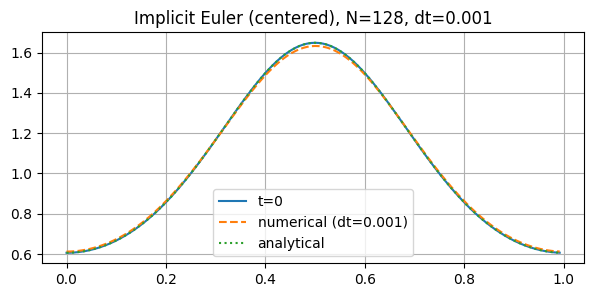

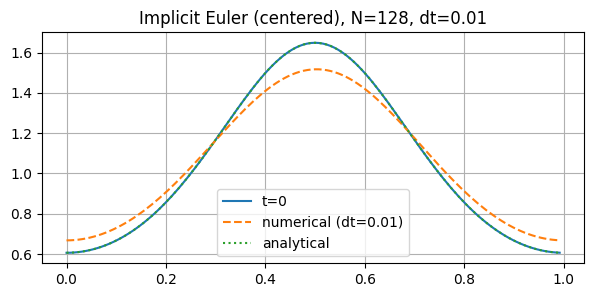

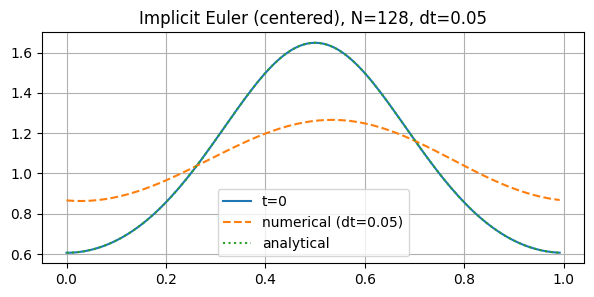

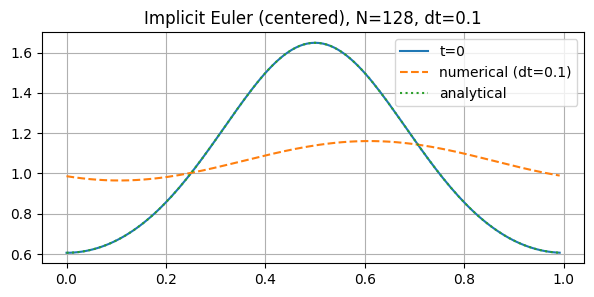

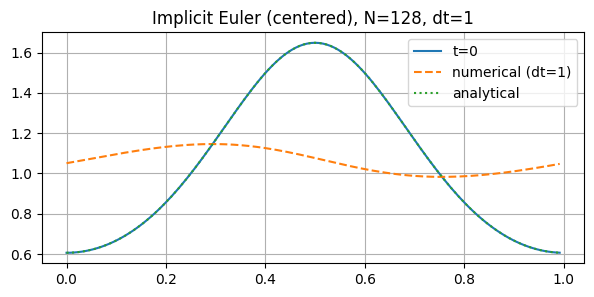

In [ ]:
#2.3.1 backward euler method

import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
from math import ceil

import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
from math import ceil

c = 1.0
t_final = 1.0

def u_initial(x):
    return np.exp(-0.5 * np.cos(2.0 * np.pi * x))

def analytic_solution(x, t, c=1.0):
    return u_initial((x + c*t) % 1.0)

def build_M(N, dx, dt, c=1.0):
    nu = (c * dt) / (2.0 * dx)
    main = np.ones(N)
    lower = np.full(N, nu)
    upper = np.full(N, -nu)
    M = sp.diags([lower, main, upper], offsets=[-1, 0, 1], shape=(N, N), format='lil')
    M[0, N-1] = nu
    M[N-1, 0] = -nu
    return M.tocsr()

def implicit_euler_centered(u0, dx, dt, t_final, c=1.0):
    N = u0.size
    M = build_M(N, dx, dt, c=c)
    solve = spla.factorized(M)
    u = u0.copy()
    nsteps = int(ceil(t_final / dt))
    for n in range(nsteps):
        u = solve(u)
        if not np.isfinite(u).all():
            break
    return u

if __name__ == "__main__":
    N = 128
    dx = 1.0 / N
    x = np.linspace(0.0, 1.0, N, endpoint=False)
    u0 = u_initial(x)
    u_analytical = analytic_solution(x, t_final, c=c)
    for dt in [1e-3, 1e-2, 5e-2, 0.1, 1]:
        u_num = implicit_euler_centered(u0, dx, dt, t_final, c=c)
        u_exact = analytic_solution(x, t_final, c=c)
        plt.figure(figsize=(7,3))
        plt.plot(x, u0, label='t=0')
        plt.plot(x, u_num, '--', label=f'numerical (dt={dt})')
        plt.plot(x, u_analytical, ':', label='analytical')
        plt.title(f'Implicit Euler (centered), N={N}, dt={dt}')
        plt.legend()
        plt.grid(True)
        plt.show()

/usr/local/lib/python3.12/dist-packages/scipy/sparse/linalg/_dsolve/linsolve.py:606: SparseEfficiencyWarning: splu converted its input to CSC format
  return splu(A).solve


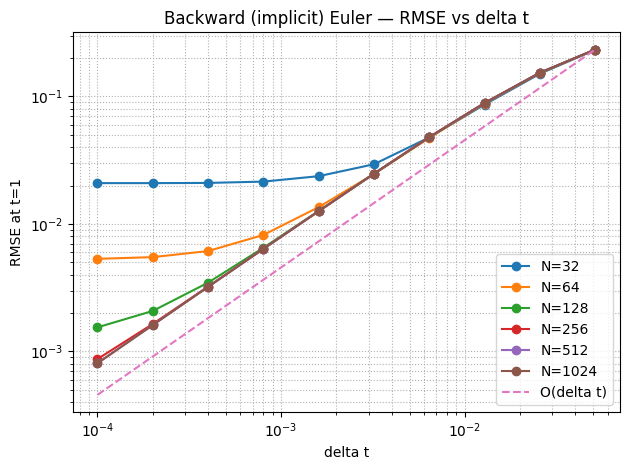

In [ ]:
N_values = [2**l for l in range(5, 11)]
dt_values = [1e-4 * 2**m for m in range(0, 10)]

results = {}
for N in N_values:
    dx = 1.0 / N
    x = np.linspace(0, 1, N, endpoint=False)
    u0 = u_initial(x)
    rmses = []
    for dt in dt_values:
        u_num = implicit_euler_centered(u0, dx, dt, t_final, c)
        u_analytical = analytic_solution(x, t_final, c)
        rmse = np.sqrt(np.mean((u_num - u_analytical)**2))
        rmses.append(rmse)
    results[N] = rmses

for N in N_values:
    plt.loglog(dt_values, results[N], 'o-', label=f'N={N}')
plt.loglog(dt_values, results[N_values[-1]][-1]*(np.array(dt_values)/dt_values[-1]), '--', label='O(delta t)')
plt.xlabel('delta t')
plt.ylabel('RMSE at t=1')
plt.title('Backward (implicit) Euler — RMSE vs delta t')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()

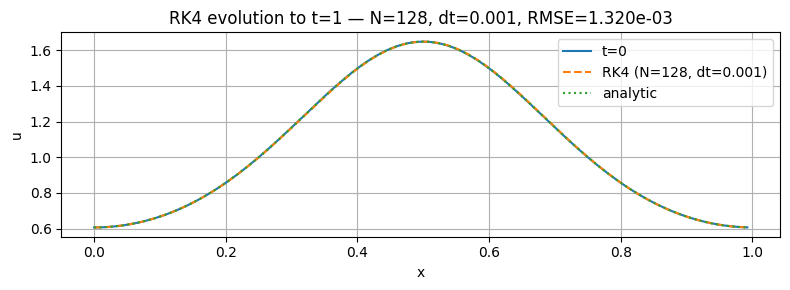

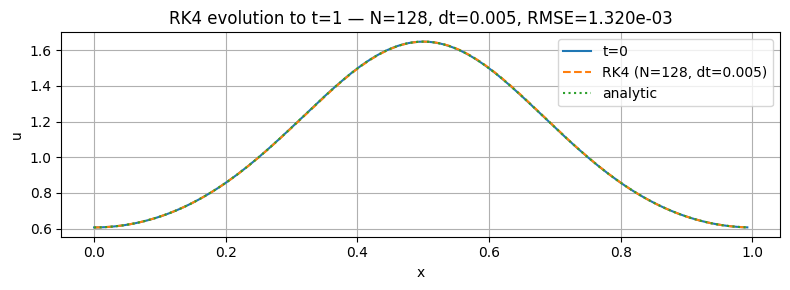

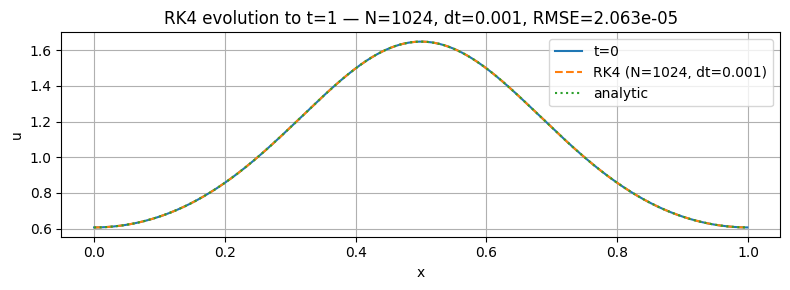

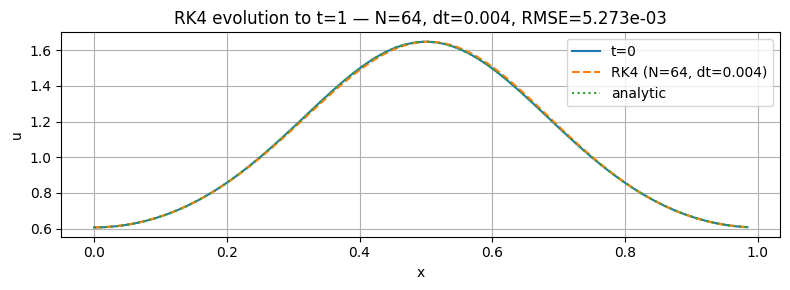

In [ ]:
#RK4 evolution

def rk4_step(u, dt, dx, c=1.0):
    k1 = c * centered_difference(u, dx)
    k2 = c * centered_difference(u + 0.5*dt*k1, dx)
    k3 = c * centered_difference(u + 0.5*dt*k2, dx)
    k4 = c * centered_difference(u + dt*k3, dx)
    return u + (dt/6.0) * (k1 + 2.0*k2 + 2.0*k3 + k4)

def rk4_evolve(u0, dx, dt, t_final, c=1.0):
    u = u0.copy()
    nsteps = int(ceil(t_final / dt))
    for _ in range(nsteps):
        u = rk4_step(u, dt, dx, c)
        if not np.isfinite(u).all() or np.max(np.abs(u)) > 1e8:
            return None
    return u

if __name__ == "__main__":
    experiments = [
        {"N": 128, "dt": 0.001},
        {"N": 128, "dt": 0.005},
        {"N": 1024, "dt": 0.001},
        {"N": 64,  "dt": 0.004},
    ]

    for exp in experiments:
        N = exp["N"]
        dt = exp["dt"]
        dx = 1.0 / N
        x = np.linspace(0.0, 1.0, N, endpoint=False)
        u0 = u_initial(x)
        u_num = rk4_evolve(u0, dx, dt, t_final, c)
        u_analytical = analytic_solution(x, t_final, c)

        plt.figure(figsize=(8,3))
        plt.plot(x, u0, label="t=0")
        if u_num is None:
            plt.title(f"RK4 blow-up or instability (N={N}, dt={dt})")
        else:
            plt.plot(x, u_num, '--', label=f"RK4 (N={N}, dt={dt})")
            plt.plot(x, u_analytical, ':', label="analytic")
            rmse = np.sqrt(np.mean((u_num - u_analytical)**2))
            plt.title(f"RK4 evolution to t=1 — N={N}, dt={dt}, RMSE={rmse:.3e}")
        plt.xlabel("x")
        plt.ylabel("u")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

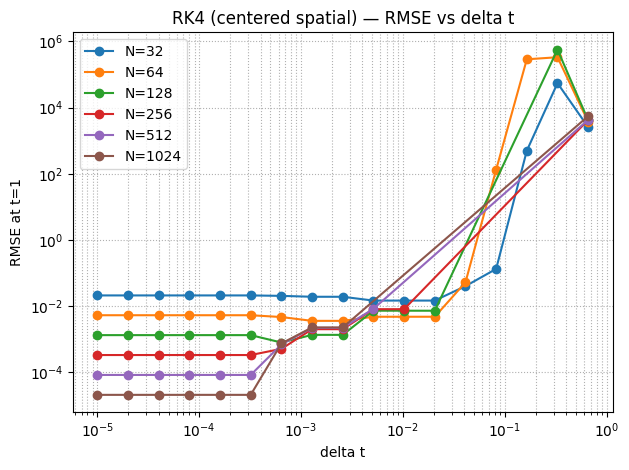


N=32
dt=1.000e-05  RMSE=2.093e-02
dt=2.000e-05  RMSE=2.093e-02
dt=4.000e-05  RMSE=2.093e-02
dt=8.000e-05  RMSE=2.093e-02
dt=1.600e-04  RMSE=2.093e-02
dt=3.200e-04  RMSE=2.093e-02
dt=6.400e-04  RMSE=2.030e-02
dt=1.280e-03  RMSE=1.906e-02
dt=2.560e-03  RMSE=1.906e-02
dt=5.120e-03  RMSE=1.461e-02
dt=1.024e-02  RMSE=1.462e-02
dt=2.048e-02  RMSE=1.463e-02

N=64
dt=1.000e-05  RMSE=5.273e-03
dt=2.000e-05  RMSE=5.273e-03
dt=4.000e-05  RMSE=5.273e-03
dt=8.000e-05  RMSE=5.273e-03
dt=1.600e-04  RMSE=5.273e-03
dt=3.200e-04  RMSE=5.273e-03
dt=6.400e-04  RMSE=4.650e-03
dt=1.280e-03  RMSE=3.563e-03
dt=2.560e-03  RMSE=3.563e-03
dt=5.120e-03  RMSE=4.741e-03
dt=1.024e-02  RMSE=4.741e-03
dt=2.048e-02  RMSE=4.745e-03

N=128
dt=1.000e-05  RMSE=1.320e-03
dt=2.000e-05  RMSE=1.320e-03
dt=4.000e-05  RMSE=1.320e-03
dt=8.000e-05  RMSE=1.320e-03
dt=1.600e-04  RMSE=1.320e-03
dt=3.200e-04  RMSE=1.320e-03
dt=6.400e-04  RMSE=7.887e-04
dt=1.280e-03  RMSE=1.344e-03
dt=2.560e-03  RMSE=1.344e-03
dt=5.120e-03  RMSE=7.224

In [ ]:
#2.4.2 stability

N_values = [2**l for l in range(5, 11)]
dt_values = [1e-5 * 2**m for m in range(0, 17)]

results = {}
for N in N_values:
    dx = 1.0 / N
    x = np.linspace(0.0, 1.0, N, endpoint=False)
    u0 = u_initial(x)
    rmses = []
    for dt in dt_values:
        u_num = rk4_evolve(u0, dx, dt, t_final, c)
        u_analytical = analytic_solution(x, t_final, c)
        if u_num is None:
            rmses.append(np.nan)
        else:
            rmses.append(np.sqrt(np.mean((u_num - u_analytical)**2)))
    results[N] = np.array(rmses)


for N in N_values:
    rmses = results[N]
    mask = np.isfinite(rmses)
    if np.any(mask):
        plt.loglog(np.array(dt_values)[mask], rmses[mask], marker='o', label=f'N={N}')
    else:
        plt.plot([], [], label=f'N={N} (unstable)')
plt.xlabel('delta t')
plt.ylabel('RMSE at t=1')
plt.title('RK4 (centered spatial) — RMSE vs delta t')
plt.grid(True, which='both', ls=':')
plt.legend()
plt.tight_layout()
plt.show()

for N in N_values:
    print(f"\nN={N}")
    for dt, rmse in zip(dt_values[:12], results[N][:12]):
        print(f"dt={dt:.3e}  RMSE={'{:.3e}'.format(rmse) if np.isfinite(rmse) else 'UNSTABLE'}")

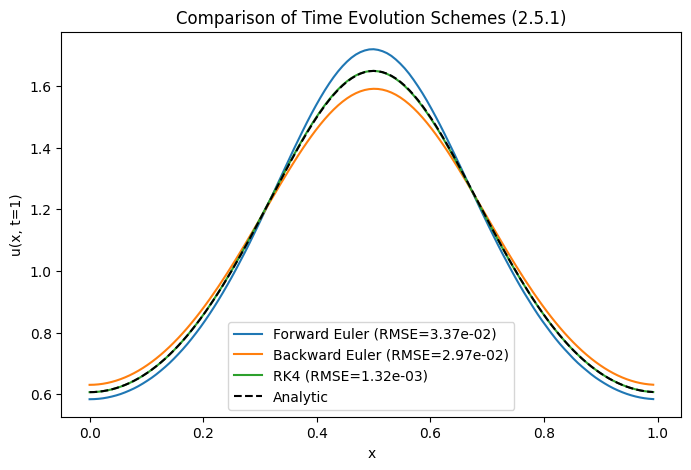

Forward Euler   RMSE = 3.3684e-02
Backward Euler  RMSE = 2.9665e-02
RK4             RMSE = 1.3198e-03


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
c = 1.0
N = 128
x = np.linspace(0, 1, N, endpoint=False)
dx = x[1] - x[0]
dt = 0.5 * dx / c
T = 1.0
steps = int(T / dt)

# Initial condition
u0 = np.exp(-0.5 * np.cos(2 * np.pi * x))

# Analytical solution
def u_analytic(t):
    return np.exp(-0.5 * np.cos(2 * np.pi * ((x + c * t) % 1)))

# Centered difference operator
def dudx(u):
    return (np.roll(u, -1) - np.roll(u, 1)) / (2 * dx)

# Forward Euler
def forward_euler(u):
    for _ in range(steps):
        u = u + dt * (-c * dudx(u))
    return u

# Backward Euler (implicit)
def backward_euler(u):
    # Build circulant matrix A = I - c * dt * D
    from scipy.linalg import circulant
    e = np.zeros(N)
    e[1] = -0.5
    e[-1] = 0.5
    D = circulant(e) / dx
    A = np.eye(N) - c * dt * D
    A_inv = np.linalg.inv(A)
    for _ in range(steps):
        u = A_inv @ u
    return u

# Runge–Kutta 4 (RK4)
def rk4(u):
    for _ in range(steps):
        k1 = -c * dudx(u)
        k2 = -c * dudx(u + 0.5 * dt * k1)
        k3 = -c * dudx(u + 0.5 * dt * k2)
        k4 = -c * dudx(u + dt * k3)
        u = u + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return u

# Run all methods
methods = {'Forward Euler': forward_euler,
           'Backward Euler': backward_euler,
           'RK4': rk4}

u_true = u_analytic(T)
errors = {}

plt.figure(figsize=(8,5))
for name, method in methods.items():
    u_num = method(u0.copy())
    rmse = np.sqrt(np.mean((u_num - u_true)**2))
    errors[name] = rmse
    plt.plot(x, u_num, label=f"{name} (RMSE={rmse:.2e})")

plt.plot(x, u_true, 'k--', label="Analytic")
plt.legend()
plt.xlabel("x")
plt.ylabel("u(x, t=1)")
plt.title("Comparison of Time Evolution Schemes (2.5.1)")
plt.show()

# Print error summary
for name, err in errors.items():
    print(f"{name:15s} RMSE = {err:.4e}")

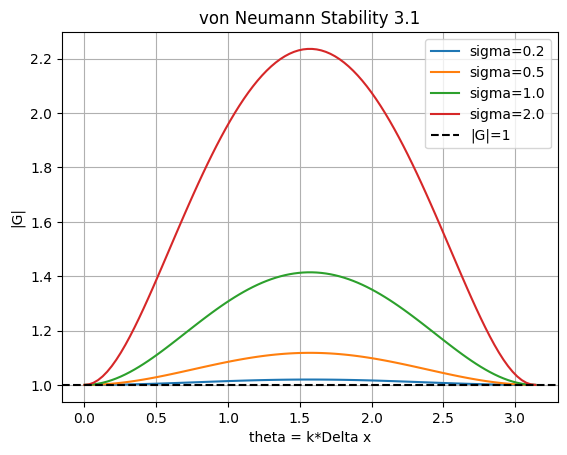

σ = 0.20 → 98 unstable modes out of 100
σ = 0.50 → 98 unstable modes out of 100
σ = 1.00 → 98 unstable modes out of 100
σ = 2.00 → 98 unstable modes out of 100


In [ ]:
#von neuman 3.2
import numpy as np
import matplotlib.pyplot as plt

# given
sigma_values = [0.2, 0.5, 1.0, 2.0]
theta = np.linspace(0, np.pi, 100)

# plot

for sigma in sigma_values:
    G = 1 - 1j * sigma * np.sin(theta)   # amplification factor
    plt.plot(theta, np.abs(G), label=fr"sigma={sigma}")

plt.axhline(1, color='k', linestyle='--', label=r"|G|=1")
plt.xlabel(r"theta = k*Delta x")
plt.ylabel(r"|G|")
plt.title("von Neumann Stability 3.1")
plt.legend()
plt.grid(True)
plt.show()

#verification
for sigma in sigma_values:
    G = 1 - 1j * sigma * np.sin(theta)
    unstable_modes = np.sum(np.abs(G) > 1.0)
    print(f"σ = {sigma:.2f} → {unstable_modes} unstable modes out of {len(theta)}")

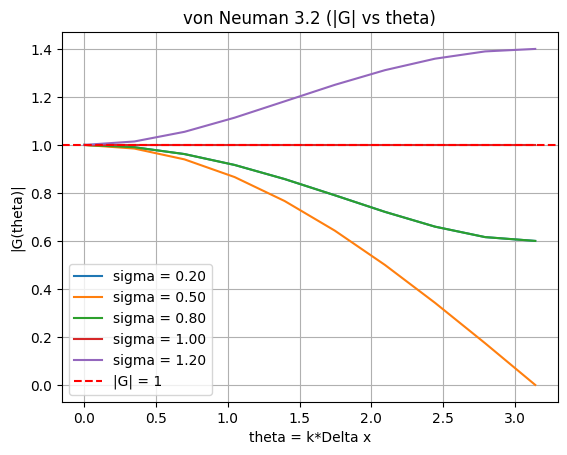

sigma = 0.20 -> unstable modes: 0/10  (fraction 0.000)
sigma = 0.50 -> unstable modes: 0/10  (fraction 0.000)
sigma = 0.80 -> unstable modes: 0/10  (fraction 0.000)
sigma = 1.00 -> unstable modes: 0/10  (fraction 0.000)
sigma = 1.20 -> unstable modes: 9/10  (fraction 0.900)


In [ ]:
#von neuman 3.2
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, np.pi, 10)
sigma_list = [0.2, 0.5, 0.8, 1.0, 1.2]


for sigma in sigma_list:
    G = 1 - sigma + sigma * np.exp(-1j * theta)  # amplification factor
    plt.plot(theta, np.abs(G), label=f"sigma = {sigma:.2f}")

plt.axhline(1.0, color='r', linestyle='--', label='|G| = 1')
plt.xlabel(r'theta = k*Delta x')
plt.ylabel(r'|G(theta)|')
plt.title('von Neuman 3.2 (|G| vs theta)')
plt.legend()
plt.grid(True)
plt.show()

#verification
for sigma in sigma_list:
    G = 1 - sigma + sigma * np.exp(-1j * theta)
    unstable = np.sum(np.abs(G) > 1.0)
    print(f"sigma = {sigma:.2f} -> unstable modes: {unstable}/{len(theta)}  (fraction {unstable/len(theta):.3f})")


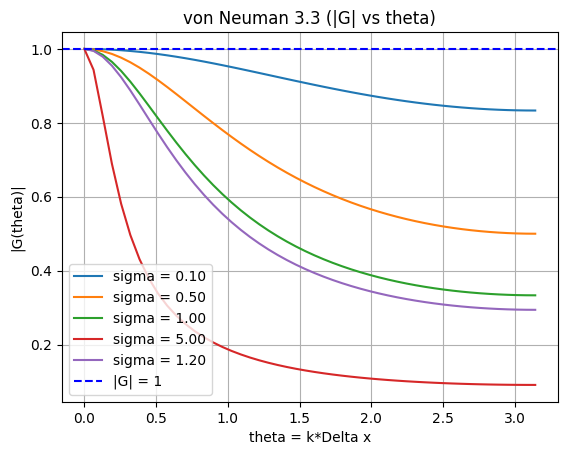

sigma = 0.10 -> max |G| = 1.000000
sigma = 0.50 -> max |G| = 1.000000
sigma = 1.00 -> max |G| = 1.000000
sigma = 5.00 -> max |G| = 1.000000
sigma = 1.20 -> max |G| = 1.000000


In [ ]:
#von neuman 3.3

import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, np.pi, 50)
sigma_list = [0.1, 0.5, 1.0, 5.0, 1.2]


for sigma in sigma_list:
    d = 1 + sigma - sigma * np.exp(-1j * theta)
    G = 1/d
    plt.plot(theta, np.abs(G), label=f"sigma = {sigma:.2f}")

plt.axhline(1.0, color='b', linestyle='--', label='|G| = 1')
plt.xlabel(r'theta = k*Delta x')
plt.ylabel(r'|G(theta)|')
plt.title('von Neuman 3.3 (|G| vs theta)')
plt.legend()
plt.grid(True)
plt.show()

# Numerical check: ensure |G| <= 1 for sample sigmas
for sigma in sigma_list:
    d = 1 + sigma - sigma * np.exp(-1j * theta)
    G = 1.0/d
    max_abs = np.max(np.abs(G))
    print(f"sigma = {sigma:.2f} -> max |G| = {max_abs:.6f}")